# Load data from csv files

In [2]:
import pandas as pd

burned_area = pd.read_excel('burn_data.xlsx', sheetname='Burned_Area')
temperature = pd.read_excel('burn_data.xlsx', sheetname='Temperature')
leaf_area = pd.read_excel('burn_data.xlsx', sheetname='Leaf_Area')

In [364]:
# Merge three csv files according to the column of 'system:index'
# 1. Merge "temperature" and "leaf_area" into temp_leaf by inner_join
# 2. Merge "burn_area" and temp_leaf into burned_temp_leaf by right_join
# If a csv file doesn't have matched 'system:index' value, the field value is 'nan'
# Reference link: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
temp_leaf = pd.merge(left=temperature, right=leaf_area, left_on='system:index', right_on='system:index') 
burned_temp_leaf = pd.merge(left=burned_area, right=temp_leaf, how='right', left_on='system:index', right_on='system:index')
print(burned_temp_leaf.columns)
#print(btl)

Index(['system:index', 'BurnDate', 'FirstDay', 'LastDay', 'QA', 'Uncertainty',
       'ppt', 'tdmean', 'tmax', 'tmean', 'tmin', 'vpdmax', 'vpdmin', 'Fpar',
       'FparExtra_QC', 'FparLai_QC', 'FparStdDev', 'Lai', 'LaiStdDev'],
      dtype='object')


In [6]:
#burned_temp_leaf.to_excel('burned_temp_leaf.xlsx')

In [365]:
# Fill in 100 for the uncertainty of date has no fire
y = burned_temp_leaf['Uncertainty'].fillna(100).values.tolist()

# Prune the unuseful columns
del burned_temp_leaf['system:index'] # Unnecessary
del burned_temp_leaf['BurnDate'] # Unnecessary
del burned_temp_leaf['FirstDay'] # Unnecessary
del burned_temp_leaf['LastDay'] # Unnecessary
del burned_temp_leaf['QA'] # Unnecessary
del burned_temp_leaf['Uncertainty'] # Unnecessary

del burned_temp_leaf['ppt']   # Degrade
#del burned_temp_leaf['tdmean']
#del burned_temp_leaf['tmax']
#del burned_temp_leaf['tmean']
del burned_temp_leaf['tmin']   # Degrade

#del burned_temp_leaf['vpdmax']
#del burned_temp_leaf['vpdmin']
#del burned_temp_leaf['Fpar']
#del burned_temp_leaf['FparExtra_QC']
del burned_temp_leaf['FparLai_QC'] # No contribution
#del burned_temp_leaf['FparStdDev']
#del burned_temp_leaf['Lai']
del burned_temp_leaf['LaiStdDev'] # No contribution

X = burned_temp_leaf.values.tolist()

In [366]:
from sklearn.model_selection import train_test_split
first_non_fire_idx = X.index(100)
print(first_non_fire_idx)
X_fire = X[:131]
y_fire = y[:131]
#X_nofire = X[132:]
#y_nofire = y[132:]
X_fire_train, X_fire_test, y_fire_train, y_fire_test = train_test_split(X_fire, y_fire, test_size=0.2, random_state=42)
#X_nofire_train, X_nofire_test, y_nofire_train, y_nofire_test = train_test_split(X_nofire, y_nofire, test_size=0.10, random_state=42)
#print(X_fire)
#print(y_fire)

# Data Normalization

In [20]:
from sklearn.preprocessing import StandardScaler

In [296]:
scaler = StandardScaler()
scaler.fit(X_fire_train)
X_fire_train = scaler.transform(X_fire_train)
X_fire_test = scaler.transform(X_fire_test)
print(y_fire_train)
print(y_fire_test)

[4.0, 2.0, 5.0, 1.0, 3.0, 3.0, 2.0, 1.0, 1.0, 3.0, 2.0, 4.0, 6.0, 2.0, 5.0, 2.0, 5.0, 6.0, 4.0, 6.0, 4.0, 2.0, 3.0, 1.0, 3.0, 7.0, 6.0, 3.0, 7.0, 2.0, 3.0, 1.0, 2.0, 6.0, 3.0, 3.0, 8.0, 5.0, 4.0, 2.0, 4.0, 1.0, 5.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 3.0, 6.0, 2.0, 4.0, 8.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 3.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 1.0, 3.0, 5.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 8.0, 9.0, 3.0, 3.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 5.0, 4.0, 5.0, 5.0, 1.0, 2.0, 2.0, 3.0, 2.0, 3.0]
[3.0, 3.0, 7.0, 6.0, 5.0, 3.0, 4.0, 7.0, 4.0, 2.0, 2.0, 5.0, 5.0, 1.0, 1.0, 1.0, 9.0, 5.0, 2.0, 7.0, 2.0, 8.0, 5.0, 6.0, 2.0, 1.0, 1.0]


# ANN Training

In [5]:
# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
from sklearn.neural_network import MLPClassifier

In [361]:
mlp = MLPClassifier(hidden_layer_sizes=(11,11),solver='lbfgs',activation='logistic',random_state=700,early_stopping=True,max_iter=1000)
mlp.fit(X_fire_train, y_fire_train)
y_fire_pred = mlp.predict(X_fire_test)
#y_nofire_pred = lr.predict(X_nofire_test)

In [362]:
import numpy as np
print(np.mean(y_fire_pred == y_fire_test))
#print(np.mean(y_nofire_pred == y_nofire_test))
#print(y_fire_pred)
#print(y_fire_test)
print(mlp)
print(mlp.predict(X_fire_train))

0.3333333333333333
MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(11, 11), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=700, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
[4. 2. 5. 1. 3. 3. 2. 1. 1. 3. 1. 4. 6. 2. 5. 2. 5. 3. 2. 6. 3. 2. 3. 3.
 3. 7. 6. 3. 7. 2. 3. 1. 2. 6. 3. 3. 8. 5. 4. 2. 4. 1. 5. 1. 2. 1. 3. 5.
 1. 3. 1. 3. 6. 2. 4. 8. 2. 2. 2. 2. 2. 1. 4. 2. 3. 2. 3. 6. 1. 1. 1. 1.
 3. 4. 4. 1. 3. 5. 3. 4. 2. 3. 2. 3. 8. 9. 3. 3. 1. 3. 1. 2. 1. 3. 5. 4.
 5. 5. 1. 2. 2. 3. 2. 3.]


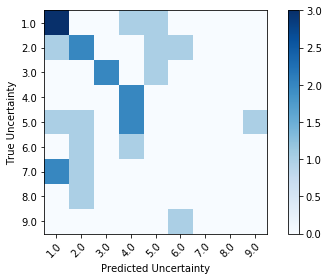

In [363]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_fire_test, y_fire_pred)

# Only uses the labels that appear in the data
labels = unique_labels(y_fire_test, y_fire_pred)
#print(cm)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           ylabel='True Uncertainty',
           xlabel='Predicted Uncertainty')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fig.tight_layout()